<div class="alert alert-info">
    

# Assignment 3: Chicago Crimes
# MSDS420 
<br>
<br>

    
**Author:**  Atef Bader, PhD
    
**Last Edit:**  11/20/2020

<br>
</div>

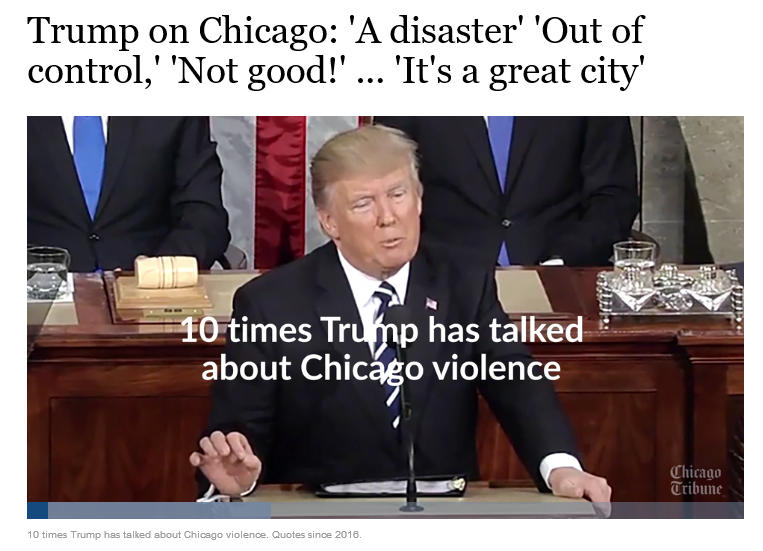

# Deliverables:

- Submit a single zip-compressed file that has the name: YourLastName_Assignment_5 that has the following files:

 1. Your **PDF document** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

- Use SQL to execute different queries to retrieve data from Chicago Crime dataset and Police statins dataset
- Use Geospatial queries  to locate **police stations** and **gun** related crimes (with arrest or no arrest) in every district on **Choropleth** map
- Use Geospatial queries  to provide **descriptive stat** for every **district** on Choropleth map
- Use Geospatial queries  to locate the **Block** that is the furthest (Maximum Distance) from the police station that has gun related crime resulted in arrest






# Submission Formats :

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or any other compression method.)


1. Complete IPYNB script that has the source code in Python used to access and analyze the data. The code should be submitted as an IPYNB script that can be be loaded and run in Jupyter Notebook for Python
2. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use the Data Science Computing Cluster or School of Professional Studies database servers or systems, include Linux logs of your sessions as plain text files. Linux logs may be generated by using the script process at the beginning of your session, as demonstrated in tutorial handouts for the DSCC servers.
3. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code:
http://pep8.org/ (Links to an external site.)Links to an external site.
There is the Google style guide for Python at
https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site.
Comment often and in detail.




# Descriptions and Requirement Specifications

## Chicago Crimes

In his first state of the uniion address , president Trump mentioned Chicago violance 10 times __[Trump's State of the Union Address](http://www.chicagotribune.com/news/local/breaking/ct-trump-tweets-quotes-chicago-htmlstory.html)__ 

## Chicago  has more homicides than New York and Los Angeles combined

Columnist Clarence Page wrote an   __[article](http://www.chicagotribune.com/news/opinion/page/ct-perspec-page-trump-murder-rate-jeff-sessions-0103-20180102-story.html)__ , published by the Chicago Tribune stated that the city of Chicago had **more homicides in the past two years than New York and Los Angeles combined**

# Chicago Police Department

Chicago police department  __[CPD](https://home.chicagopolice.org/)__  issues and publishes on daily basis on its website crime alerts, and press releases for the different __[districts](https://home.chicagopolice.org/about/police-districts/)__ .

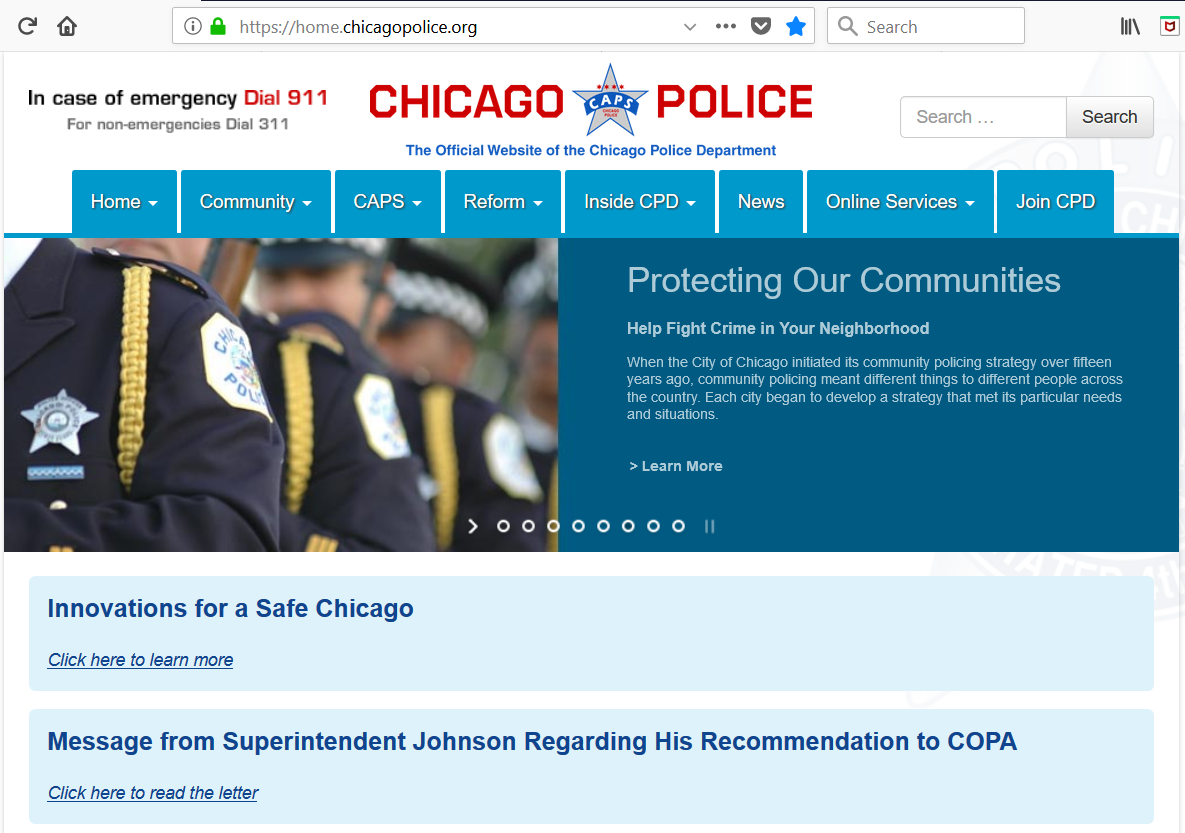



# The CPD categoizes the crimes into 8 categories as follows:

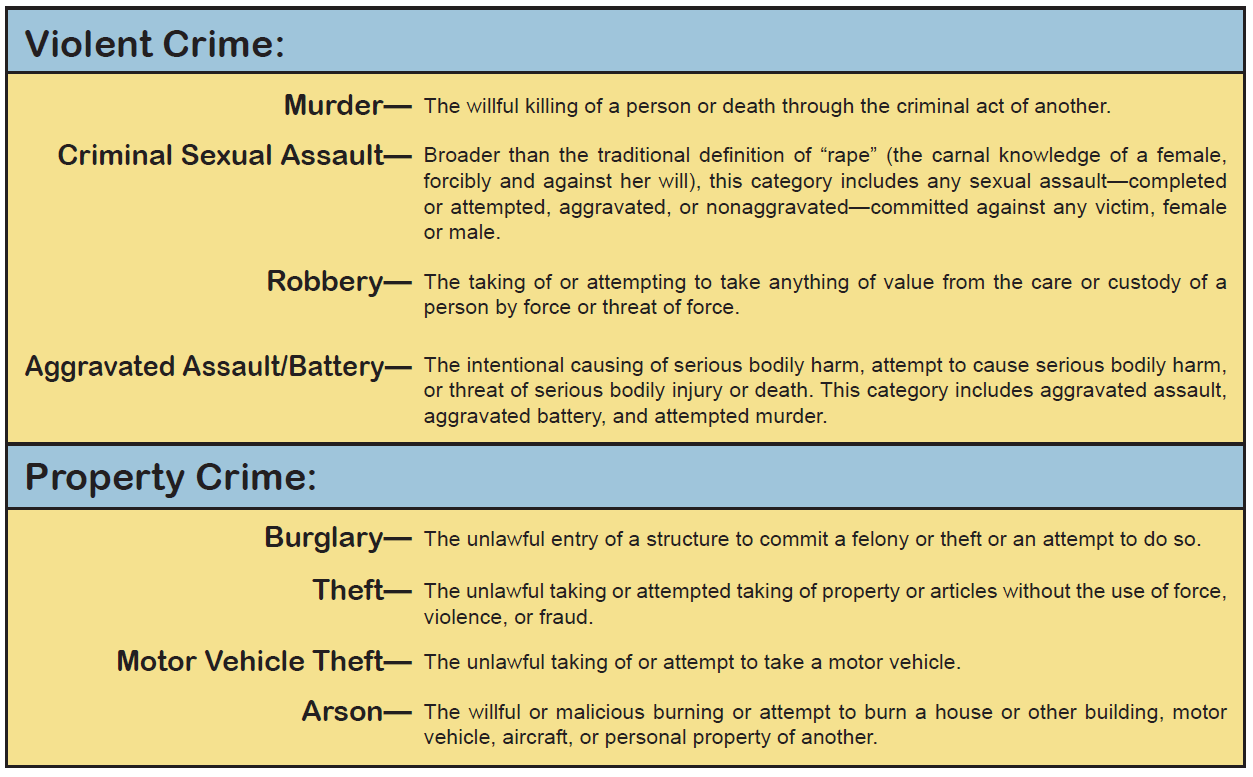


# Chicago Crimes Dataset

The CSV file for crimes dataset for  the city of Chicago is obtained from the data portal for the city of Chicago. Here is the link for the city of Chicago data portal __[City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)__ 




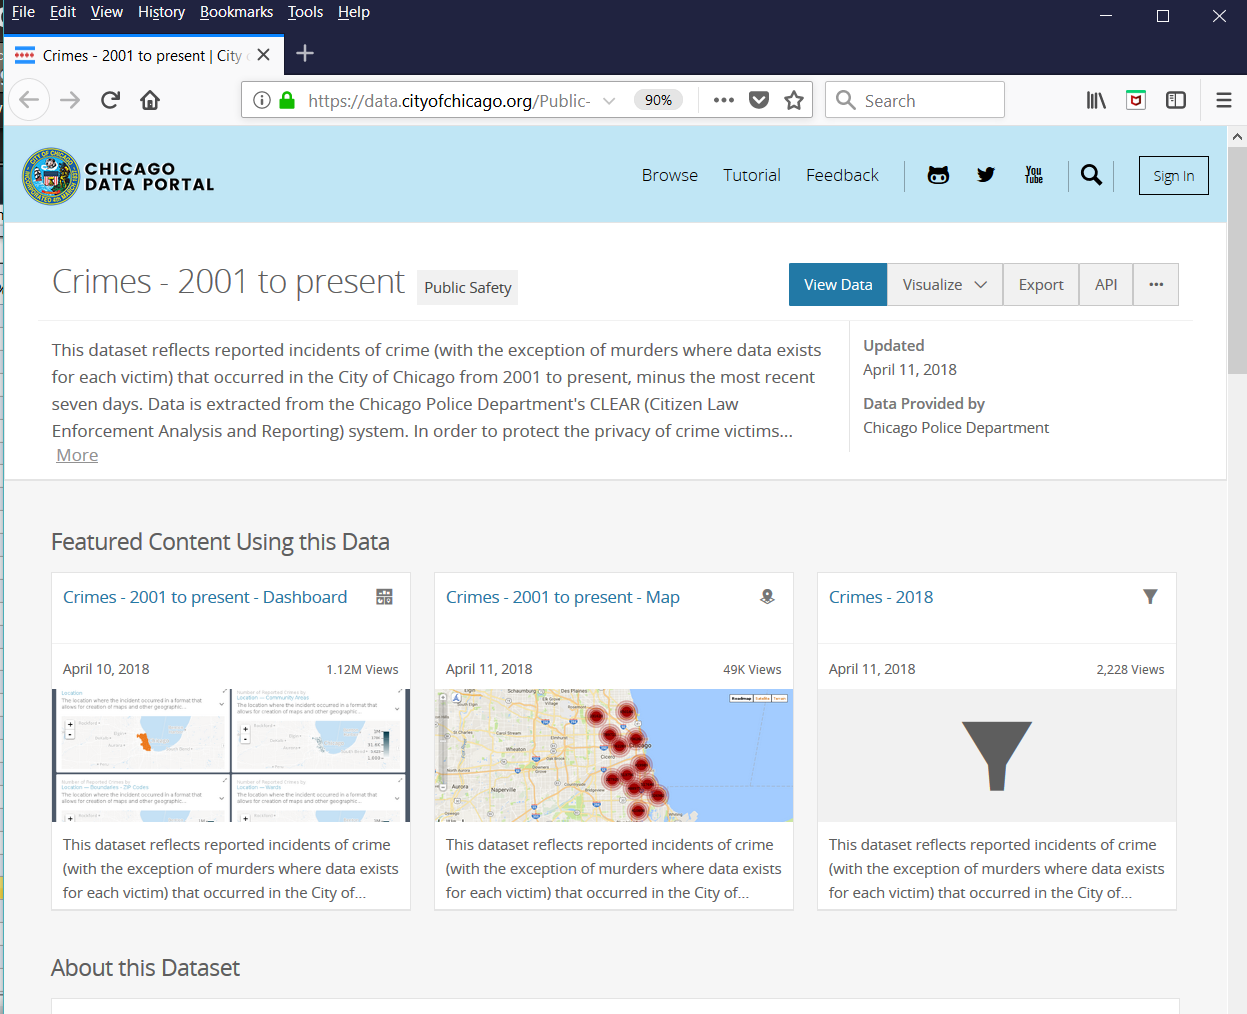

### Dataset CSV files

Three datasets are used in this assignment:
1. The Chicago police stations in every district
2. The Boundaries.geojson data for district boundries
3. The Crimes dataset 


Complete description of the dataset can be found on Chicago city data portal.

Based on Trumps State of the Uniion Address and the article written by  columnist Clarence Page and  published by the Chicago Tribune, we are interested to retrieve the data for the past two years and perform different types of spatial queries.

There are few of these queries that we are interested in to help CPD and city of Chicago to plot on a Choroplteh map those districts that have highest gun crimes. 

Here are examples of those types of quereis:

1. Plot on **Choropleth map** the **districts** and their **Violent Crimes**
2. Plot on Choropleth map the districts and their **Gun** related crimes
3. Which district is the **crime capital** of **Chicago districts**?
4. What the **crime density** per **district**?
5. Plot on Choropleth map those **gun related crimes** that resulted in **arrests**
5. Plot on Choropleth map the gun related crime that is in the **farthest Block**  from the **policy stattion** for every **district**  




Packages you need to Connect **PostgreSQL** server to load and retrieve Crhicago Crime dataset from the database:

1. **psycopg2:** for PostgreSQL driver
2. **area:** to calculate the area inside of any GeoJSON geometry
3. **Folium:** for Choropleth maps


Execute the **pip install** command from the command window to install  the packages listed bove


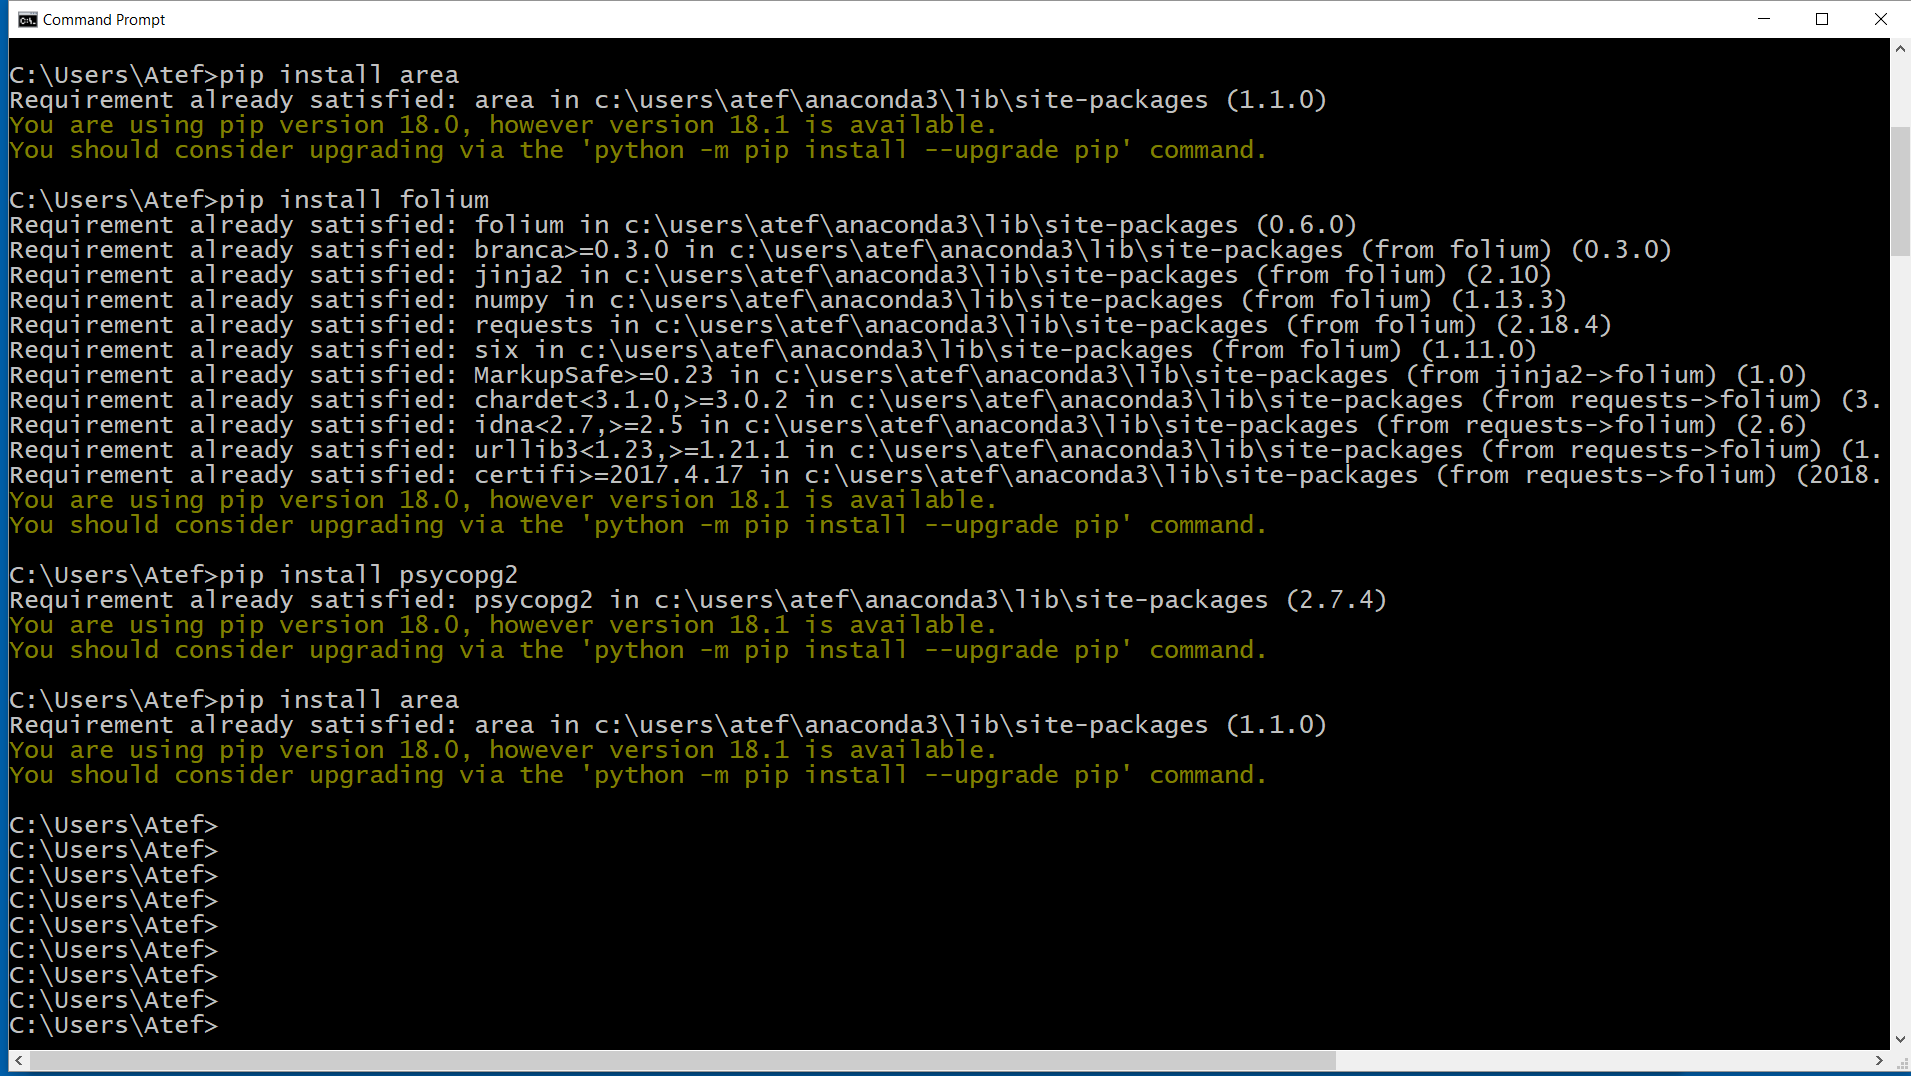

Execute the following **pip show** command from the command line to get info about any package you installed. Make sure that the packages got installed into Anaconda library since we are using Anaconda tool; please see below the pakcage info


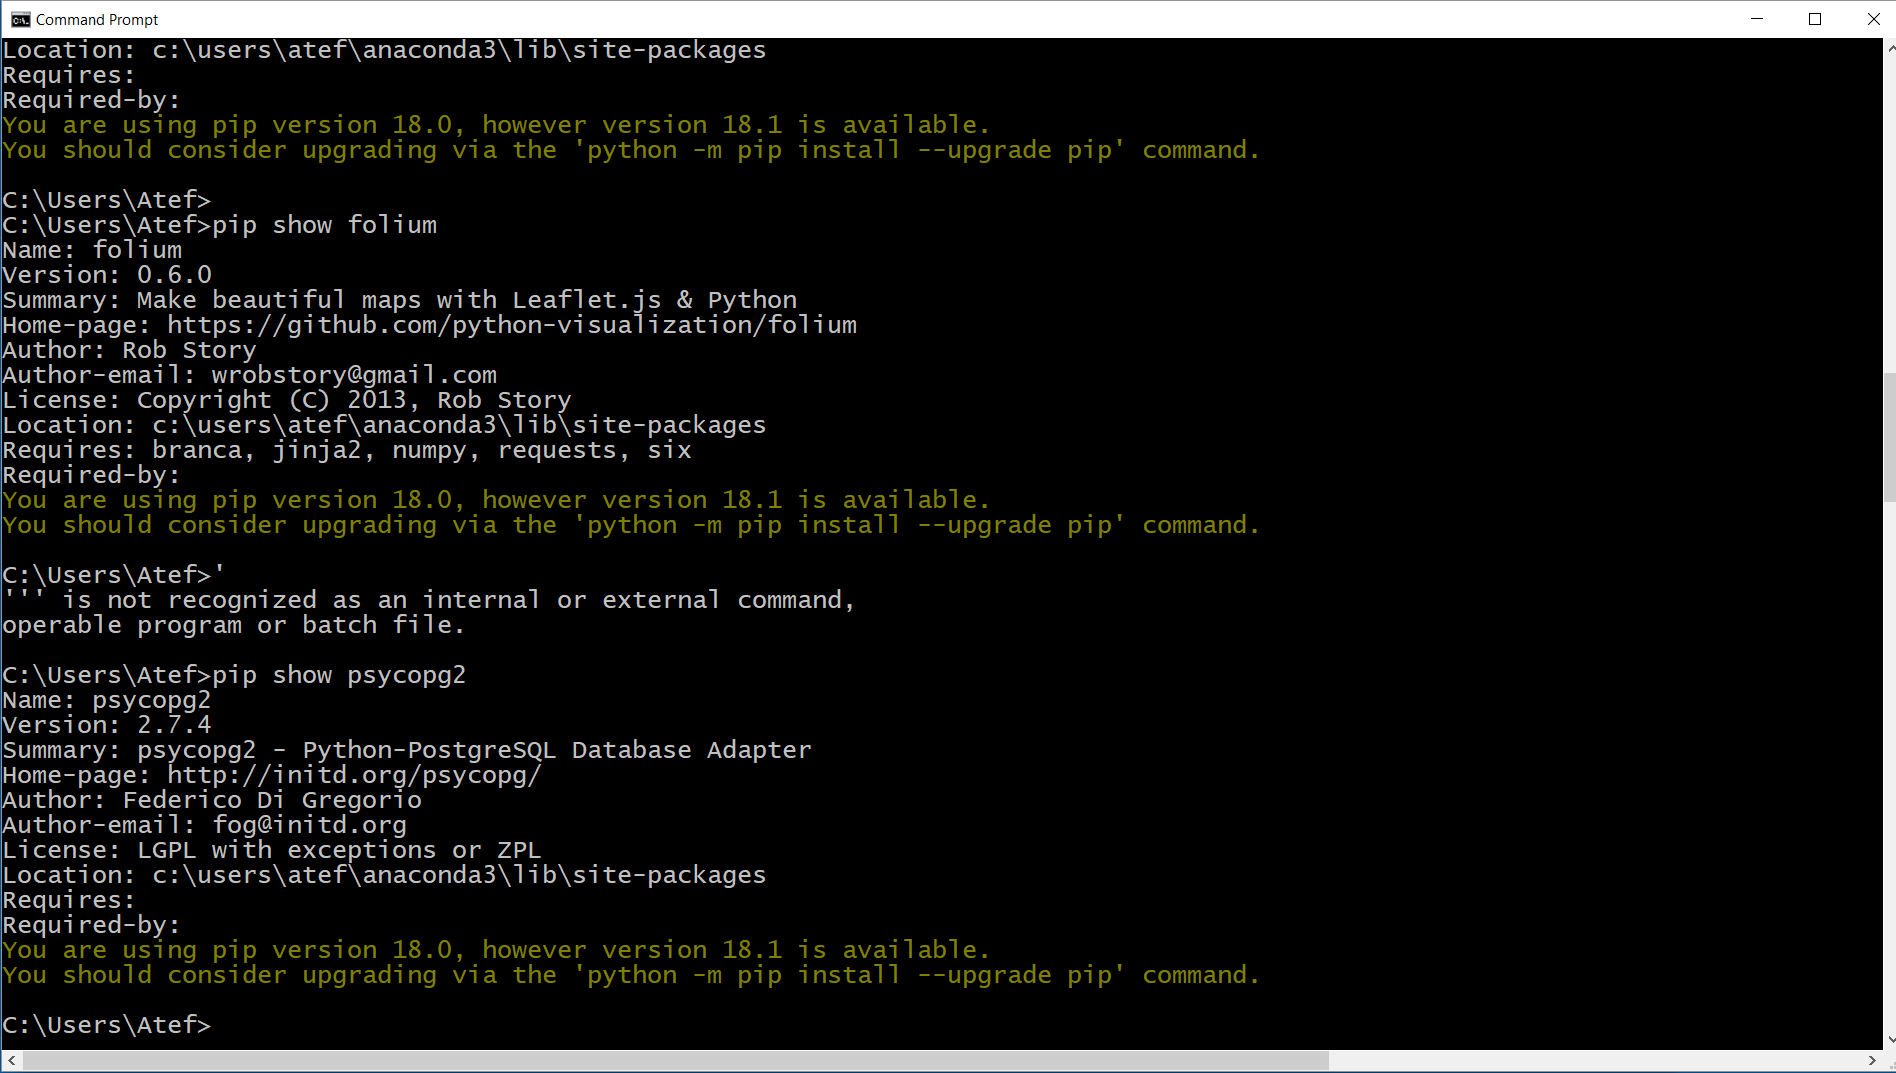

Since we are using PostGIS in our work, please read and bookmark __[Chapter 4. Using PostGIS: Data Management and Queries](https://postgis.net/docs/manual-1.4/ch04.html)__ 


In [1]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import psycopg2
import csv
import pandas as pd
import json
from area import area

from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT 


# IMPORTANT NOTES:
- In this  assignment you will be connecting to DSCC PostgreSQL server that has the database and tables already created on the server. 
- You need to use your NetID (your netid is case-sensitive) and password for login and passward to connect PostgreSQL server hosted on DSCC
- For the psycopg2.connect statements listed below, you must provide your NetID and password in order to connect to PostgreSQL server hosted on DSCC
- For the **dbname** below use **chicago_crimes_ut** as your database while debugging/testing your code and use **chicago_crimes** as your database for your final submission

In [2]:
# Use this data set for your final submission of your Assignment 3
# Uncomment the following line after you unit test your code and ready to run and submit your assignment on this dataset 

# db_connection = psycopg2.connect(host='129.105.248.26',dbname="chicago_crimes", user="YourNetID" , password="YourPassword")




# Use the following dataset for unit testing purposes only. It takes roughly 5 minutes to omplete.
# Comment the following line when you are done with your unit testing and ready to run your assignment on the complete dataset and submit your Assignment 

db_connection = psycopg2.connect(host='129.105.248.26',dbname="chicago_crimes_ut", user="YourNetid" , password="YourPassword")


cursor = db_connection.cursor()

OperationalError: FATAL:  role "YourNetid" does not exist


### Chicago Crimes Dataset

The chicago crimes database on the DSCC/PostgreSQL server was created using data from the Crimes_2001_to_present.csv file that is available on Chicago data portal.

While working on this dataset, It is prudent to make a note of the following:
1. Geospatial  queries are very demanding for system resouces like CPU, GPU, Memory, and DISK
1. We are interested in the data set of the past 2 years, and when you execute Geospatial type queries, please be advised that these queries slow down your machine. 
2. There are two dataset that you will use in this assignment
    - **chicago_crimes_ut**  : Use this  mini dataset that has data for rougly a month for coding/debugging and unit testing
    - **chicago_crimes** : Use this dataset that has data for 2 years for your final submission


### Algorithm Performance

- **Sort algorithms** used by the database engines vary in performance between O($N log N$) and O($ N^{2} $) where $N$ is the size of the number

- **Search algorithms** used by the database engines vary in performance between O($log N$) and O($ N $) where $N$ is the size of the number




## What are the column names in the 2 tables that we will use from chicago_crimes database?

In [ ]:
# Get the column names for table crimes

cursor.execute("SELECT column_name FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'crimes';")

rows=cursor.fetchall()

rows

In [ ]:
# Get the column names for table police_stations

cursor.execute("SELECT column_name FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'police_stations';")

rows=cursor.fetchall()

rows

## Lets get a sample of 5 rows from the crimes table in the database

In [ ]:
# Get 5 rows from the table crimes

cursor.execute("SELECT * from crimes limit 5;")

rows=cursor.fetchall()

rows

In [ ]:
cursor.execute("SELECT count(*) from crimes;")

rows=cursor.fetchall()

rows

## Lets execute  few  Queries

## Query #1:
- Calculate the total number of crimes in every district and plot that on Choropleth map

In [ ]:
cursor.execute("SELECT district, count(district) from crimes GROUP BY district")
rows=cursor.fetchall()

In [ ]:
crimes_per_district = pd.DataFrame(rows, columns=['dist_num','number_of_crimes'])
crimes_per_district['dist_num'] = crimes_per_district['dist_num'].astype(str)

crimes_per_district.head()

In [ ]:
crimes_dataset = pd.DataFrame(rows)

In [ ]:
crimes_dataset.head()

In [ ]:
total_number_of_crimes_per_district_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)

In [ ]:
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='OrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = crimes_per_district,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'number_of_crimes']
              ).add_to(total_number_of_crimes_per_district_map)

In [ ]:
cursor.execute("""SELECT ST_X(ST_AsText(Where_IS)), ST_Y(ST_AsText(Where_IS)), district from police_stations where district!='Headquarters'""")
police_stations = cursor.fetchall()

for police_station in police_stations:
    police_station_location = (police_station[0],police_station[1])
    cursor.execute("SELECT district, count(district) from crimes where district= %s GROUP BY district",[police_station[2]])
    districts_crime_numbers = cursor.fetchall()
    for district in districts_crime_numbers:
        folium.Marker(location = police_station_location,popup=folium.Popup(html="District No : %s  has   Total Number of Crimes:%s" %district ,max_width=450)).add_to(total_number_of_crimes_per_district_map)


- **Lets plot the Choropleth map and notice  the intensity of color on the different districts**
- **The Blue POPUP represents the location of police station in the different districts in the map**

In [ ]:

total_number_of_crimes_per_district_map

## Query #2:
- Calculate the total number of **violent crimes** in every district and plot that in a table on Choropleth map

Well, we really need only the violent crimes per district, so we will filter only those crimes that we are interested in. Please note that we are not interested to plot property crimes, we are really after violent crimes and in particular **Gun** related crimes.

So for now, lets plot violent crimes on Choropleth map and later on we will filter only Gun related crimes

In [ ]:
violent_crime_categories='THEFT','ASSAULT','ROBBERY','KIDNAPPING','CRIM SEXUAL ASSAULT','BATTERY','MURDER'

In [ ]:
cursor.execute("SELECT district, count(district) from crimes where PRIMARY_TYPE in %s GROUP BY district",[violent_crime_categories])
rows=cursor.fetchall()
violent_crime_data=pd.DataFrame(rows, columns=['district_num','number_of_violent_crimes'])
violent_crime_data['district_num'] = violent_crime_data['district_num'].astype(str)
violent_crime_data

In [ ]:
violent_crimes_per_district_map= folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = violent_crime_data,
              key_on='feature.properties.dist_num',
              columns = ['district_num', 'number_of_violent_crimes'],
              legend_name="VOILENT CRIME MAP"
              ).add_to(violent_crimes_per_district_map)


In [ ]:
cursor.execute("""SELECT ST_X(ST_AsText(Where_IS)), ST_Y(ST_AsText(Where_IS)), district from police_stations where district!='Headquarters'""")
police_stations = cursor.fetchall()

for police_station in police_stations:
    police_station_location =(police_station[0],police_station[1])
    cursor.execute("SELECT PRIMARY_TYPE, count(PRIMARY_TYPE) from crimes where district =%s AND PRIMARY_TYPE in %s GROUP BY PRIMARY_TYPE",[police_station[2],violent_crime_categories])
    data = cursor.fetchall()
    violent_crimes_per_district_df = pd.DataFrame(data, columns=['Description', 'Number of Violent Crimes'])
    header = violent_crimes_per_district_df.to_html(classes='table table-striped table-hover table-condensed table-responsive')
    folium.Marker(location=police_station_location, popup=folium.Popup(html="District Number %s - Violent Crimes %s" %(police_station[2],header))).add_to(violent_crimes_per_district_map)



In [ ]:
violent_crimes_per_district_map

## Query #3:
- Calculate the total number of **gun related violent crimes** in every district and plot that in a table on Choropleth map


Lets first create a dataframe of gun crimes per district first to get an idea about the number of gun crimes per district


In [ ]:
gun='%GUN%'
cursor.execute("SELECT district, count(district) from crimes where DESCRIPTION::text LIKE %s GROUP BY district",
               [gun])
districts_gun_violent_crimes = cursor.fetchall()
districts_gun_violent_crimes_df = pd.DataFrame(districts_gun_violent_crimes, columns=['dist_num',
                                                                                      'gun_crimes'])
districts_gun_violent_crimes_df['dist_num'] = districts_gun_violent_crimes_df['dist_num'].astype(str)
districts_gun_violent_crimes_df

In [ ]:
districts_gun_violent_crimes_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_violent_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="GUN CRIME"
              ).add_to(districts_gun_violent_crimes_map)


Now, lets create a dataframe of the **different types of gun crimes for every district** and then plot it on Choropleth map

In [ ]:

cursor.execute("""SELECT ST_X(ST_AsText(Where_IS)), ST_Y(ST_AsText(Where_IS)), district from police_stations where district!='Headquarters'""")

gun='%GUN%'
police_stations = cursor.fetchall()

for police_station in police_stations:
    police_station_location = (police_station[0],police_station[1])
    cursor.execute("""SELECT DESCRIPTION, count(DESCRIPTION) from crimes where district=%s and DESCRIPTION::text LIKE %s GROUP BY DESCRIPTION""",[police_station[2],gun])
    district_gun_violent_crimes=cursor.fetchall()
    district_gun_violent_crimes_df=pd.DataFrame(district_gun_violent_crimes, columns=['Description', 'Number of Gun Crime'])
    header = district_gun_violent_crimes_df.to_html(classes='table table-striped table-hover table-condensed table-responsive')
    folium.Marker(location=police_station_location,popup=folium.Popup(html="District No: %s GUN_Crime: %s" %(police_station[2],header) )).add_to(districts_gun_violent_crimes_map)
    


In [ ]:
districts_gun_violent_crimes_map

## Query #4:
- Calculate the crime density per district

In [ ]:
district=[]
tarea=[]

with open('Boundaries.geojson') as f:
    data = json.load(f)
    a = data['features']
    for i in range(len(a)):
        obj=a[i]['geometry']
        n= a[i]['properties']
        district.append(n['dist_num'])
        tarea.append(area(obj)/10000)

af=pd.DataFrame({'dist_num': district,'district_area_inHectares':tarea})
af['dist_num'] = af['dist_num'].astype(str)
final_data= pd.merge(af, crimes_per_district, on='dist_num', how='inner')
final_data['crime_density'] = round(final_data['number_of_crimes']/(final_data['district_area_inHectares']/100))
final_data

## Query #5:
- Create **Marker Clusters** on Choropleth map for those **gun related violent crimes** that resulted in **arrest (green icon)** and those that **didn't (red icon)**

In [ ]:
gun_crime_arrests_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_violent_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="GUN CRIME"
              ).add_to(gun_crime_arrests_map)


In [ ]:
cursor.execute("""SELECT ST_X(ST_AsText(Where_IS)), ST_Y(ST_AsText(Where_IS)), district from police_stations where district!='Headquarters'""")
gun='%GUN%'

police_stations = cursor.fetchall()

marker_cluster = MarkerCluster().add_to(gun_crime_arrests_map)

for police_station in police_stations:
    police_station_location = (police_station[0],police_station[1])
    cursor.execute("""SELECT DISTINCT ON(caseno) caseno, block,DESCRIPTION, count(arrest), arrest,latitude, longitude from crimes where district=%s and DESCRIPTION::text LIKE %s GROUP BY caseno,block, DESCRIPTION,arrest, latitude, longitude""",[police_station[2],gun])
    crimes_per_district = cursor.fetchall()
    for crime in crimes_per_district:
        if crime[4]==True:
            folium.Marker(location=(crime[5],crime[6]),popup=folium.Popup(html="District No: %s <br> Description: %s <br> Block: %s" %(police_station[2],crime[2],crime[1])),icon=folium.Icon(color='green', icon='ok-sign'),).add_to(marker_cluster)
        else:
            folium.Marker(location=(crime[5],crime[6]),popup=folium.Popup(html="District No: %s <br> Description: %s<br> Block: %s" %(police_station[2],crime[2],crime[1])),icon=folium.Icon(color='red', icon='remove-sign'),).add_to(marker_cluster)

            


In [ ]:
crimes_per_district[:3]

In [ ]:
gun_crime_arrests_map

## Query #6:
- Plot on Choropleth map the **farthest Block** that has a gun crime from every police station in every district 

In [ ]:
farthest_block_gun_crime_map = folium.Map(location =(41.8781, -87.6298),zoom_start=11)
folium.Choropleth(geo_data="Boundaries.geojson", 
              fill_color='YlOrRd', 
              fill_opacity=0.5, 
              line_opacity=1,
              data = districts_gun_violent_crimes_df,
              key_on='feature.properties.dist_num',
              columns = ['dist_num', 'gun_crimes'],
              legend_name="GUN CRIME"
              ).add_to(farthest_block_gun_crime_map)


In [ ]:


cursor.execute("""SELECT ST_X(ST_AsText(Where_IS)), ST_Y(ST_AsText(Where_IS)), district from police_stations where district!='Headquarters'""")
police_stations = cursor.fetchall()

gun='%GUN%'

for police_station in police_stations:
    
    cursor.execute("""
                        WITH crime_distance_from_police_station AS (
                                        SELECT  A.where_is as crime_where_is, 
                                                B.where_is as police_where_is,
                                                A.district as crime_district,
                                                A.block as crime_block,
                                                ST_Distance(A.where_is,B.where_is) as distance 
                                        FROM crimes as A, police_stations as B 
                                        WHERE A.district=%s and DESCRIPTION::text LIKE %s and B.district= %s 
                        )
    
                        SELECT DISTINCT on (crime_distance_from_police_station.crime_block) 
                                        crime_distance_from_police_station.crime_district,
                                        crime_distance_from_police_station.crime_block, 
                                        crime_distance_from_police_station.crime_where_is,
                                        crime_distance_from_police_station.distance 
                        FROM crime_distance_from_police_station 
                        WHERE distance = (SELECT max(distance) 
                                        FROM crime_distance_from_police_station )""",[police_station[2],gun,police_station[2]])
    
    farthest_block_gun_crime = cursor.fetchall()

    cursor.execute("SELECT ST_X(ST_AsText(%s)), ST_Y(ST_AsText(%s))",(farthest_block_gun_crime[0][2],farthest_block_gun_crime[0][2]))
    farthest_block_gun_crime_location = cursor.fetchall()
    folium.Marker(location=(police_station[0],police_station[1]),popup=folium.Popup(html="Police Station <br> District No.:%s <br> Farthest Gun_Crime Block:%s"%(farthest_block_gun_crime[0][0],farthest_block_gun_crime[0][1]))).add_to(farthest_block_gun_crime_map)
    folium.CircleMarker(farthest_block_gun_crime_location[0],radius=5,color='#ff3187',popup=folium.Popup(html="District No.:%s <br> Block:%s"%(farthest_block_gun_crime[0][0],farthest_block_gun_crime[0][1]))).add_to(farthest_block_gun_crime_map) 




In [ ]:
farthest_block_gun_crime_map

<br>
<div class="alert alert-warning">
    
# Requirements



**The PDF document your are submitting must have the source code and the output for the following  requirements**


</div>
<br>


### Requirement #1: 
- Calculate the gun crimes density in every district

### Requirement #2: 
- Locate the **farthest** UNLAWFUL POSS OF HANDGUN crime from the police station in every district. The popup on Choropleth map shall display the district number and the block

### Requirement #3: 

- Create **Marker Clusters** on Choropleth map for those **gun related violent crimes** that have Location Desciption as RESIDENCE in ** (green icon)** and those that have Location Desciption as STREET in **(red icon)**

### Requirement #4: 
- Locate the **Block** that has the **higest number of gun crimes**. The popup on Choropleth map shall display the Block in every district along with the total number of gun crimes for that block